<a href="https://colab.research.google.com/github/hyphen-ani/quantization/blob/main/Quantization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

## Simulating original float values (eg. model weights)
x = np.linspace(-1.0, 1.0, 100)
x[:100]

array([-1.        , -0.97979798, -0.95959596, -0.93939394, -0.91919192,
       -0.8989899 , -0.87878788, -0.85858586, -0.83838384, -0.81818182,
       -0.7979798 , -0.77777778, -0.75757576, -0.73737374, -0.71717172,
       -0.6969697 , -0.67676768, -0.65656566, -0.63636364, -0.61616162,
       -0.5959596 , -0.57575758, -0.55555556, -0.53535354, -0.51515152,
       -0.49494949, -0.47474747, -0.45454545, -0.43434343, -0.41414141,
       -0.39393939, -0.37373737, -0.35353535, -0.33333333, -0.31313131,
       -0.29292929, -0.27272727, -0.25252525, -0.23232323, -0.21212121,
       -0.19191919, -0.17171717, -0.15151515, -0.13131313, -0.11111111,
       -0.09090909, -0.07070707, -0.05050505, -0.03030303, -0.01010101,
        0.01010101,  0.03030303,  0.05050505,  0.07070707,  0.09090909,
        0.11111111,  0.13131313,  0.15151515,  0.17171717,  0.19191919,
        0.21212121,  0.23232323,  0.25252525,  0.27272727,  0.29292929,
        0.31313131,  0.33333333,  0.35353535,  0.37373737,  0.39

In [ ]:
## Define quantization parameters

x_max = 1.0
x_min = -1.0
q_max = 127
q_min = -128

scale = (x_max - x_min) / (q_max - q_min)
scale

0.00784313725490196

In [ ]:
zero_point = 0

## Quantization (float32 -> int8)
q = np.round((x - zero_point) / scale).astype(int)

q = np.clip(q, q_min, q_max)
q[:100]

array([-128, -125, -122, -120, -117, -115, -112, -109, -107, -104, -102,
        -99,  -97,  -94,  -91,  -89,  -86,  -84,  -81,  -79,  -76,  -73,
        -71,  -68,  -66,  -63,  -61,  -58,  -55,  -53,  -50,  -48,  -45,
        -42,  -40,  -37,  -35,  -32,  -30,  -27,  -24,  -22,  -19,  -17,
        -14,  -12,   -9,   -6,   -4,   -1,    1,    4,    6,    9,   12,
         14,   17,   19,   22,   24,   27,   30,   32,   35,   37,   40,
         43,   45,   48,   50,   53,   55,   58,   61,   63,   66,   68,
         71,   73,   76,   79,   81,   84,   86,   89,   91,   94,   97,
         99,  102,  104,  107,  109,  112,  115,  117,  120,  122,  125,
        127])

In [ ]:
## Dequantization: (int8 -> float32)

x_delta = scale * (q - zero_point)
x_delta[:100]

array([-1.00392157, -0.98039216, -0.95686275, -0.94117647, -0.91764706,
       -0.90196078, -0.87843137, -0.85490196, -0.83921569, -0.81568627,
       -0.8       , -0.77647059, -0.76078431, -0.7372549 , -0.71372549,
       -0.69803922, -0.6745098 , -0.65882353, -0.63529412, -0.61960784,
       -0.59607843, -0.57254902, -0.55686275, -0.53333333, -0.51764706,
       -0.49411765, -0.47843137, -0.45490196, -0.43137255, -0.41568627,
       -0.39215686, -0.37647059, -0.35294118, -0.32941176, -0.31372549,
       -0.29019608, -0.2745098 , -0.25098039, -0.23529412, -0.21176471,
       -0.18823529, -0.17254902, -0.14901961, -0.13333333, -0.10980392,
       -0.09411765, -0.07058824, -0.04705882, -0.03137255, -0.00784314,
        0.00784314,  0.03137255,  0.04705882,  0.07058824,  0.09411765,
        0.10980392,  0.13333333,  0.14901961,  0.17254902,  0.18823529,
        0.21176471,  0.23529412,  0.25098039,  0.2745098 ,  0.29019608,
        0.31372549,  0.3372549 ,  0.35294118,  0.37647059,  0.39

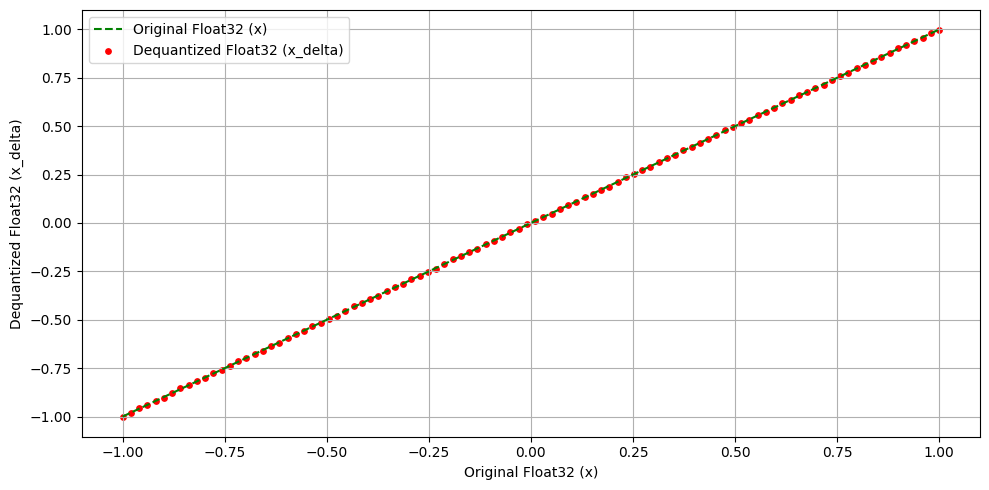

In [ ]:
from matplotlib.lines import lineStyles
## PLot original vs dequantization

plt.figure(figsize=(10, 5))
plt.plot(x, x, label="Original Float32 (x)", linestyle="--", color="green")
plt.scatter(x, x_delta, label="Dequantized Float32 (x_delta)", color="red", s=15)
plt.xlabel("Original Float32 (x)")
plt.ylabel("Dequantized Float32 (x_delta)")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

In [ ]:
nf4_values = np.array([
    -1.0, -0.75, -0.5, -0.35, -0.2, -0.1, -0.05, -0.01,
    0.01, 0.05, 0.1, 0.2, 0.35, 0.5, 0.75, 1.0
])

x = np.linspace(-1.0, 1.0, 100)
x[:10]

array([-1.        , -0.97979798, -0.95959596, -0.93939394, -0.91919192,
       -0.8989899 , -0.87878788, -0.85858586, -0.83838384, -0.81818182])

In [ ]:
def quantizationTransform(x_values, nf4_ref):
  ind = np.argmin(np.abs(x_values[:, None] - nf4_ref[None, :]), axis = 1)
  return nf4_ref[ind]


x_to_nf4 = quantizationTransform(x, nf4_values)
x_to_nf4[:10]

array([-1.  , -1.  , -1.  , -1.  , -1.  , -1.  , -1.  , -0.75, -0.75,
       -0.75])

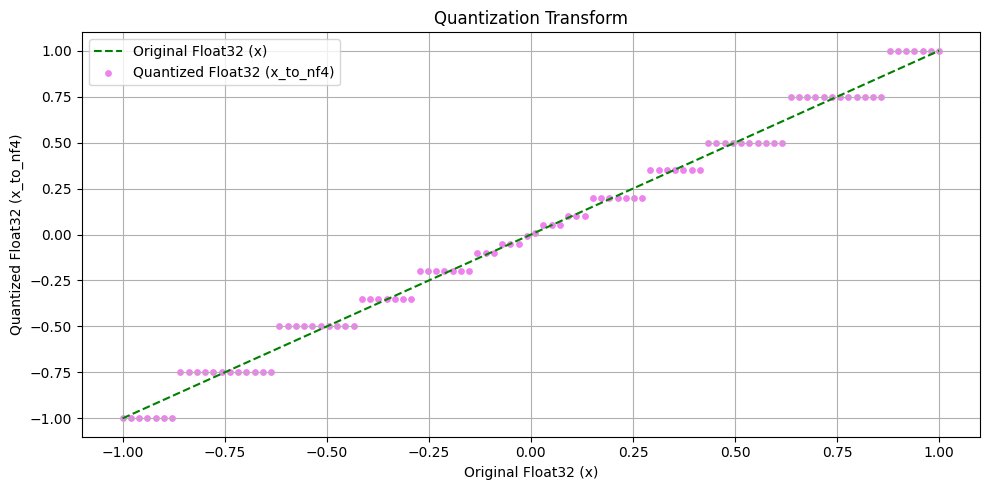

In [ ]:
plt.figure(figsize=(10, 5))
plt.plot(x, x, label="Original Float32 (x)", linestyle="--", color="green")
plt.scatter(x, x_to_nf4, label="Quantized Float32 (x_to_nf4)", color="violet", s=15)
plt.title("Quantization Transform")
plt.xlabel("Original Float32 (x)")
plt.ylabel("Quantized Float32 (x_to_nf4)")
plt.grid()
plt.legend()
plt.tight_layout()
plt.show()